# Activity 2.1 : Convolutional Neural Network

## Objective(s):

This activity aims to introduce how to build a convolutional neural network

## Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

## Resources:
* Jupyter Notebook
* CIFAR-10 dataset

## Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [ ]:
x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


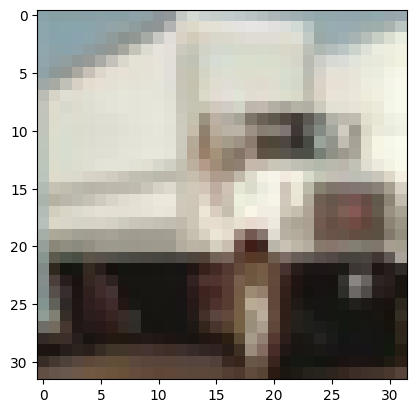

In [ ]:
print(y_train[444])
plt.imshow(x_train[444]);

In [ ]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [ ]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [ ]:
model_1 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 32s 20ms/step - loss: 1.6845 - accuracy: 0.3896 - val_loss: 1.5475 - val_accuracy: 0.4527
Epoch 2/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4147 - accuracy: 0.4934 - val_loss: 1.3244 - val_accuracy: 0.5195
Epoch 3/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3242 - accuracy: 0.5299 - val_loss: 1.3200 - val_accuracy: 0.5417
Epoch 4/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2859 - accuracy: 0.5499 - val_loss: 1.3237 - val_accuracy: 0.5375
Epoch 5/15
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2530 - accuracy: 0.5640 - val_loss: 1.2098 - val_accuracy: 0.5768
Epoch 6/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2403 - accuracy: 0.5704 - val_loss: 1.1683 - val_accuracy: 0.6004
Epoch 7/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2263 - accuracy: 0.5805 - val_loss: 1.1851 -

## Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Compare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [ ]:
from keras import layers, models

#### ***Build a more complicated model with the following pattern:***
***Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification***

#### ***Use strides of 1 for all convolutional layers.***

In [ ]:
supple_model_1 = models.Sequential([
    layers.Conv2D(32, (3,3), strides=(1,1), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.Conv2D(64, (3,3), strides=(1,1), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), strides=(1,1), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), strides=(1,1), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),

    layers.Dense(10, activation='softmax')
])

In [ ]:
supple_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

#### ***Comparing the number of parameters from the previous model to this model:***

**Answer**

In [ ]:
opt = keras.optimizers.RMSprop(lr=0.0005)

supple_model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#### ***Train it for 5 epochs.***

In [ ]:
runhist_model1 = supple_model_1.fit(x_train, y_train,
                                    batch_size = 32,
                                    epochs = 5,
                                    validation_data = (x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 437s 279ms/step - loss: 1.3677 - accuracy: 0.5115 - val_loss: 0.9748 - val_accuracy: 0.6537
Epoch 2/5
1563/1563 [==============================] - 461s 295ms/step - loss: 0.8499 - accuracy: 0.7048 - val_loss: 0.8224 - val_accuracy: 0.7124
Epoch 3/5
1563/1563 [==============================] - 451s 289ms/step - loss: 0.6376 - accuracy: 0.7797 - val_loss: 0.8769 - val_accuracy: 0.7072
Epoch 4/5
1563/1563 [==============================] - 446s 285ms/step - loss: 0.4911 - accuracy: 0.8309 - val_loss: 1.1025 - val_accuracy: 0.6829
Epoch 5/5
1563/1563 [==============================] - 444s 284ms/step - loss: 0.3820 - accuracy: 0.8715 - val_loss: 0.9054 - val_accuracy: 0.7621


In [ ]:
score = test_loss, test_acc = supple_model_1.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 23s 73ms/step - loss: 0.9054 - accuracy: 0.7621
Test loss: 0.9054360389709473
Test accuracy: 0.7620999813079834


#### ***Comparing the training time, loss and accuracy on both training and validation sets:***

 ***Answer***

In [ ]:
runhist_model1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Graph of Accuray and Loss (Training and Validation)

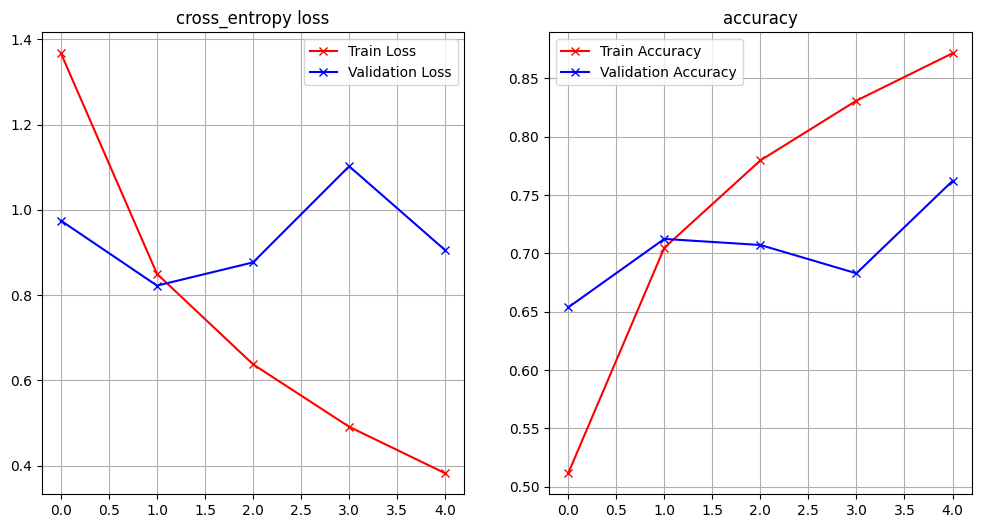

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

plot_loss_accuracy(runhist_model1)

#### ***Use different structures and run times, and see how accurate your model can be.***

In [ ]:
supple_model2 = models.Sequential([
    # CONV-CONV-MAX-CONV-CONV-MAX-CONV-CONV-MAX-FLATTEN-DENSE-DENSE
    layers.Conv2D(32, (3,3), strides=(2), activation='relu', padding='same', input_shape=(1,1,64)),
    layers.Conv2D(32, (3,3), strides=(2), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), strides=(2), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), strides=(2), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), strides=(2), activation='relu', padding='same'),
    layers.Conv2D(128,(3,3), strides=(1,1), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(10, activation='softmax')
])

In [ ]:
# model summary

supple_model2.summary()

In [ ]:
supple_model2.compile(loss='categorical_crossentropy',
                      optimizer=Adam(learaning_rate=0.001),
                      metrics = ['accuracy'])

In [ ]:
runhist_model2 = supple_model2.fit(x_train, y_train,
                                   batch_size = 32,
                                   epochs = 3,
                                   validation_data = (x_test, y_test)) # change

In [ ]:
score2 = test_loss, test_acc = supple_model2.evaluate(x_test, y_test)

print('Test Loss: ', score2[0])
print('Test Accuracy: ', score2[1])

In [ ]:
# plotting the loss and accuracy

plot_loss_accuracy(runhist_model2)

## Conclusion

In conclusion, 